In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 14998, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14998 (delta 0), reused 1 (delta 0), pack-reused 14995
Receiving objects: 100% (14998/14998), 14.03 MiB | 31.22 MiB/s, done.
Resolving deltas: 100% (10286/10286), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.6 MB/s eta 0:00:00
Setup complete. Using torch 1.13.1+cu116 

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OF8DglHLZnqxHmfivOLv")
project = rf.workspace("surbhi-patil-qaoah").project("face-mask-detection-zoer9")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/face-mask-detection-1 in yolov5pytorch:: 100%|██████████| 1708/1708 [00:00<00:00, 1820.44it/s]


In [ ]:
!python train.py --img 416 --batch 5 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/face-mask-detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=5, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0,

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/face-mask-detection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/86 /content/datasets/face-mask-detection-1/test/images/maksssksksss100_png.rf.fdadc484117ca5bba577e43a727e8736.jpg: 416x416 3 masks, 8.1ms
image 2/86 /content/datasets/face-mask-detection-1/test/images/maksssksksss103_png.rf.75fabfa801330e3cc07a19fc2dc55eb7.jpg: 416x416 4 masks, 8.3ms
image 3/86 /content/da

In [ ]:
!python detect.py --weights /content/yolov5/yolov5s.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['/content/yolov5/yolov5s.pt'], source=/content/datasets/face-mask-detection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/86 /content/datasets/face-mask-detection-1/test/images/maksssksksss100_png.rf.fdadc484117ca5bba577e43a727e8736.jpg: 416x416 4 persons, 1 handbag, 1 cell phone, 8.4ms
image 2/86 /content/datasets/face-mask-detection-1/test/images/maksssksksss103_png.rf.75fabfa801330e3cc07a19fc2dc55eb7.jpg: 416x416 6 persons, 2 motorcycles,

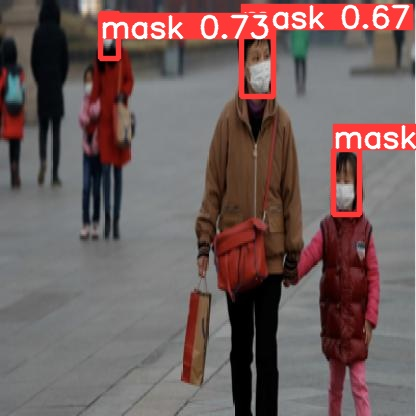

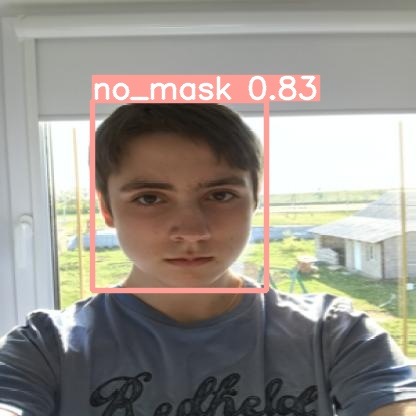

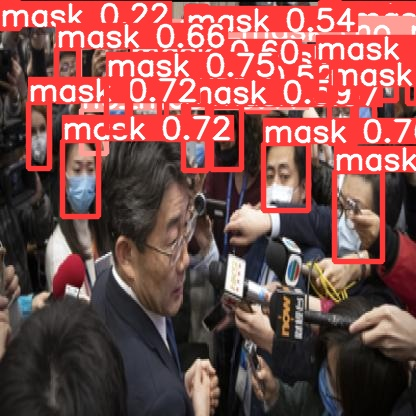

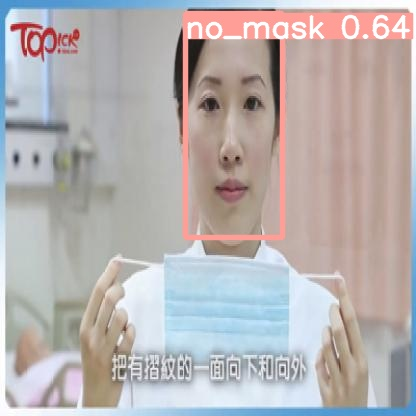

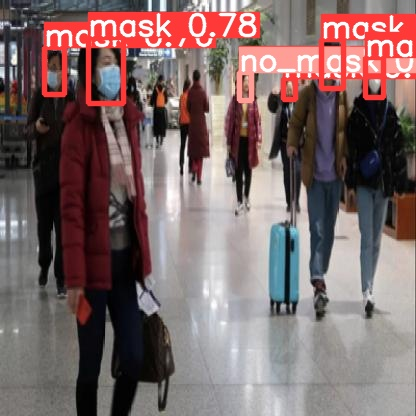

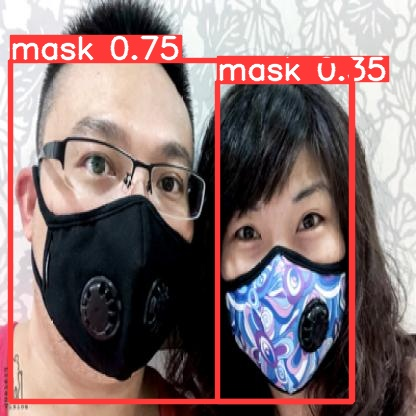

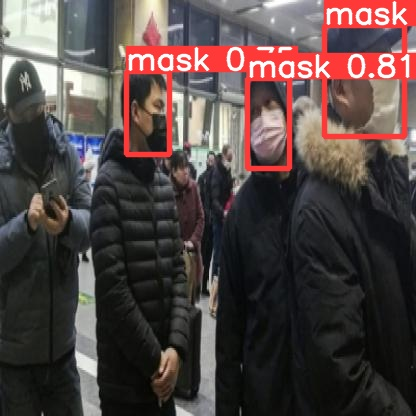

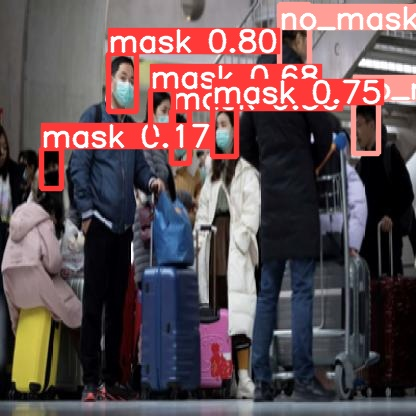

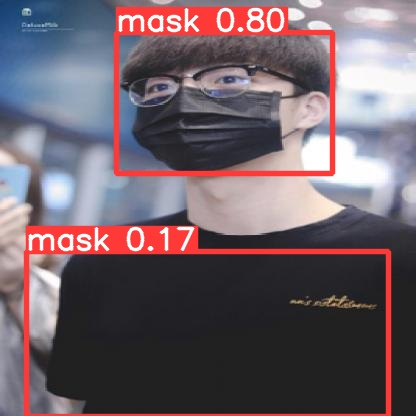

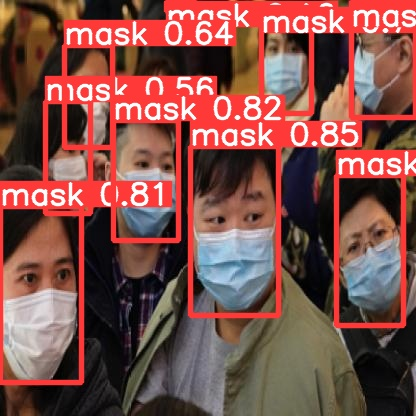

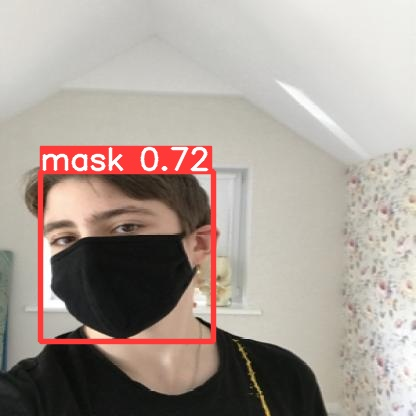

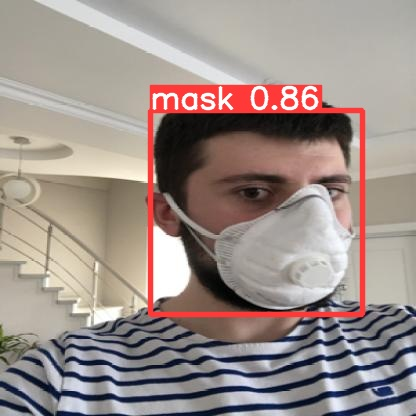

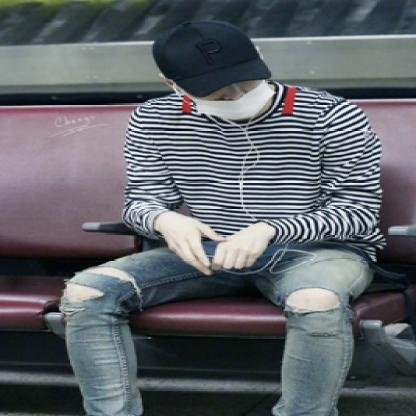

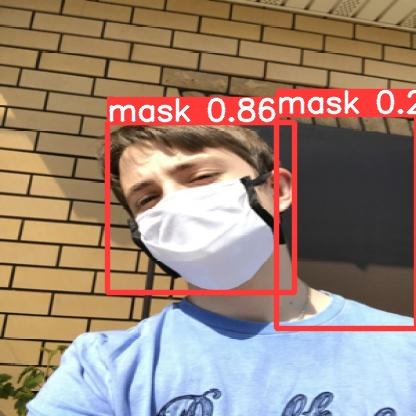

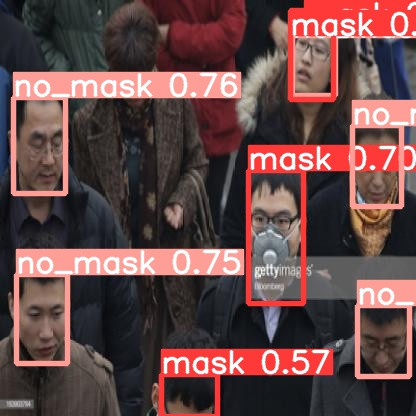

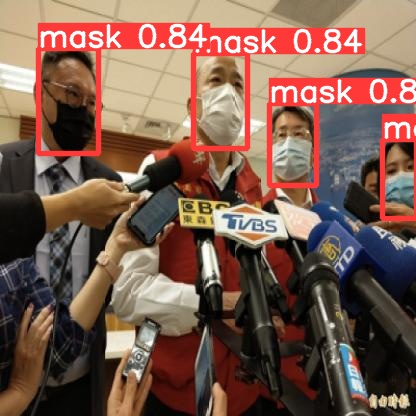

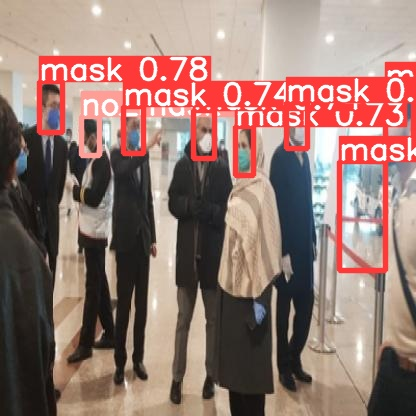

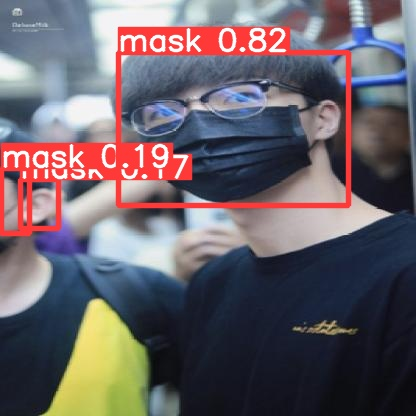

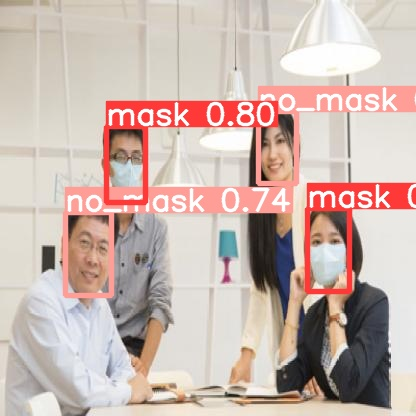

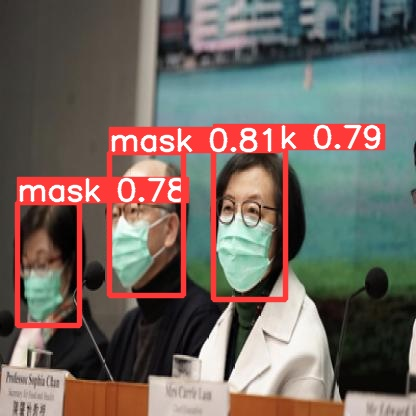

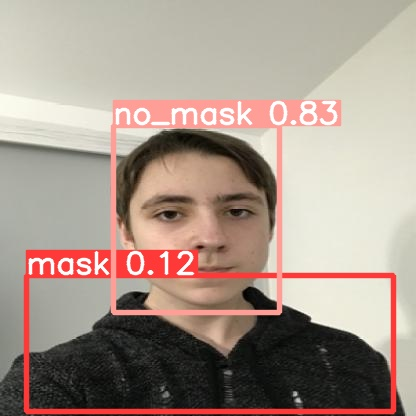

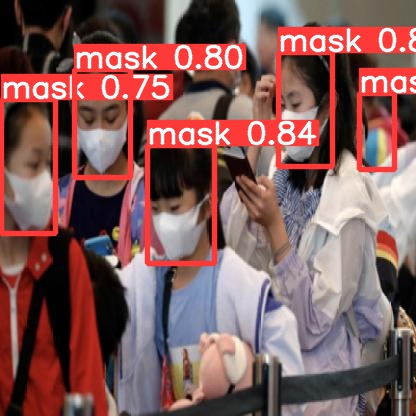

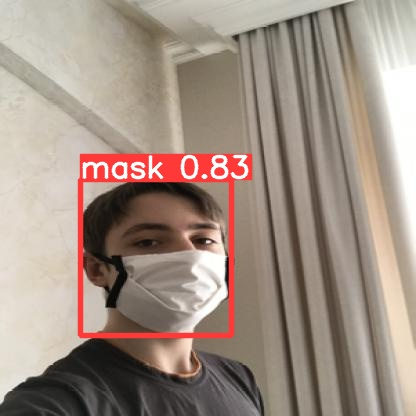

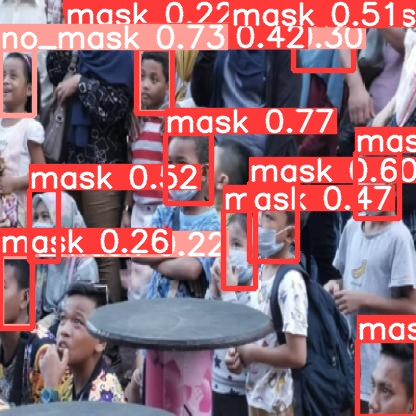

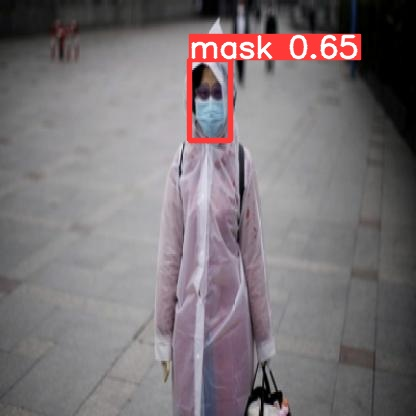

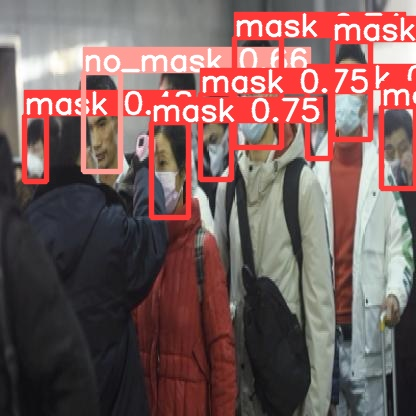

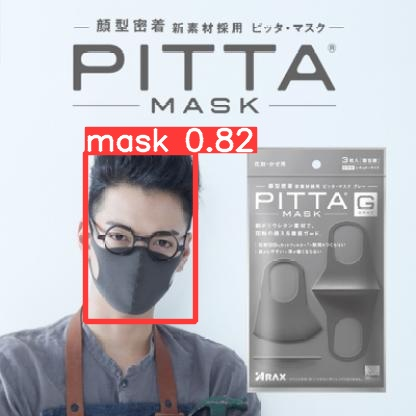

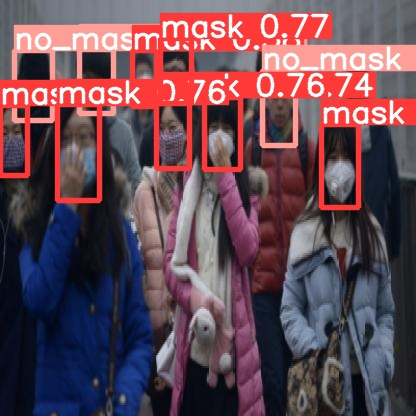

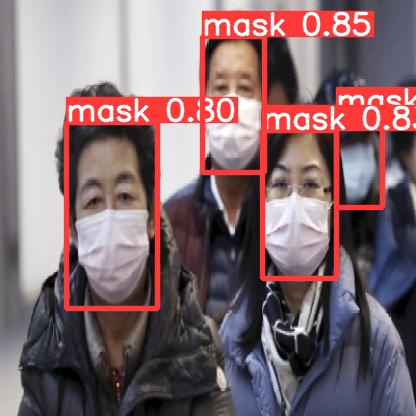

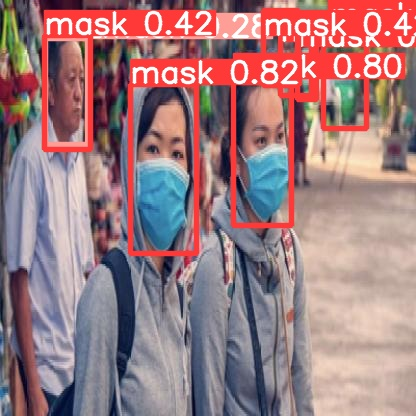

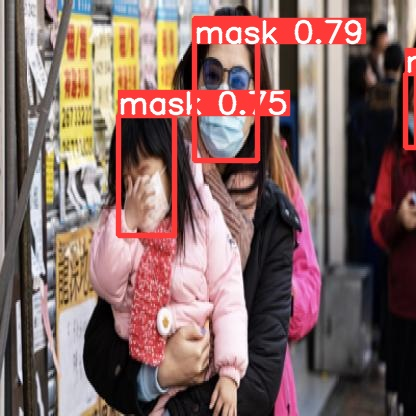

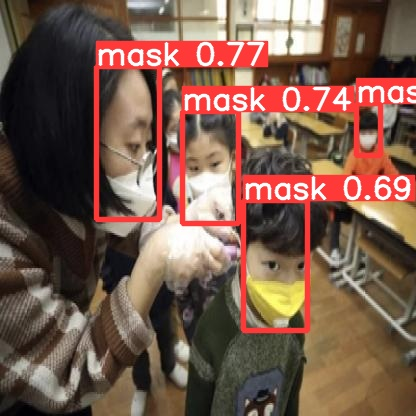

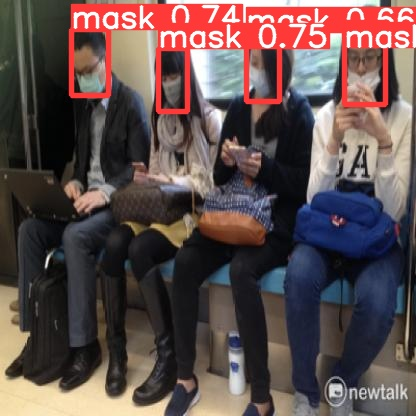

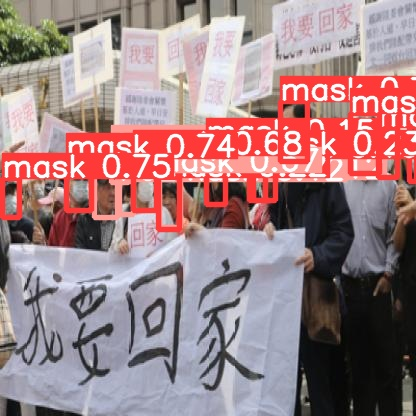

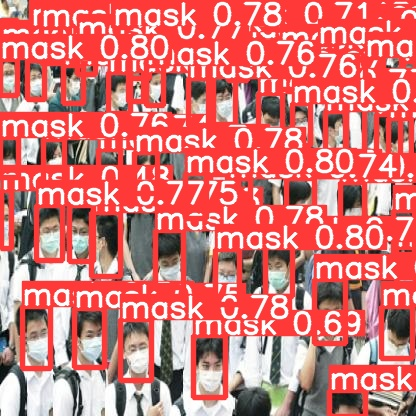

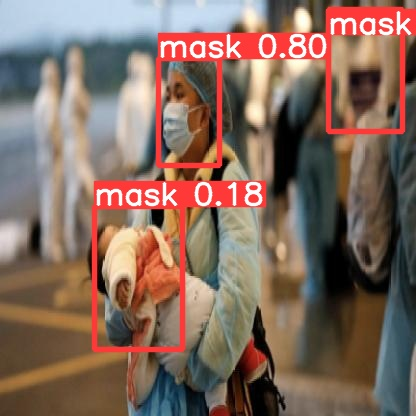

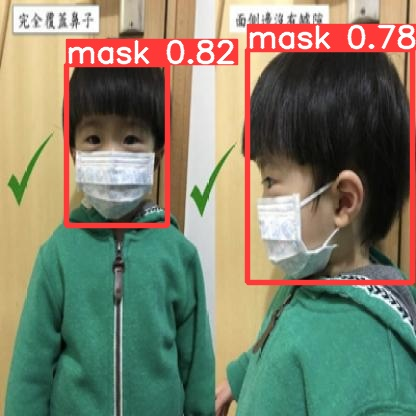

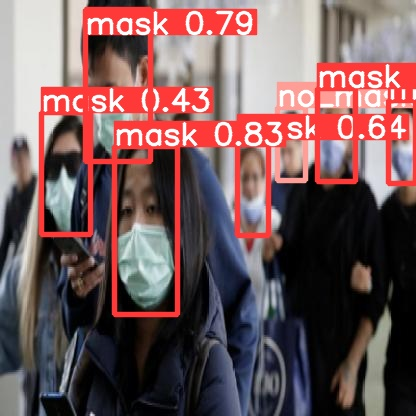

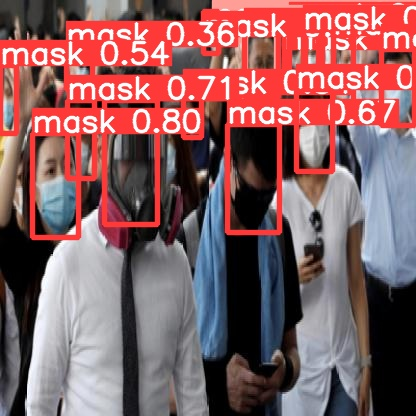

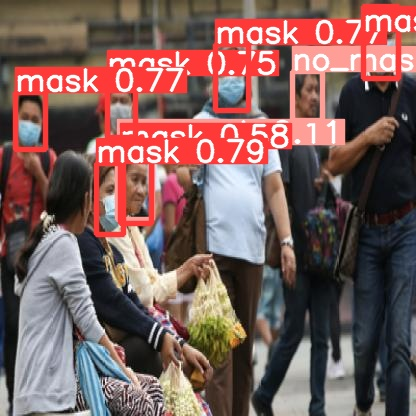

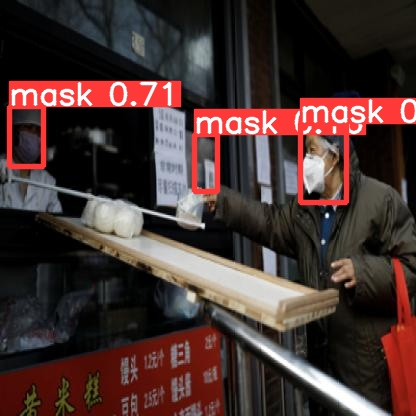

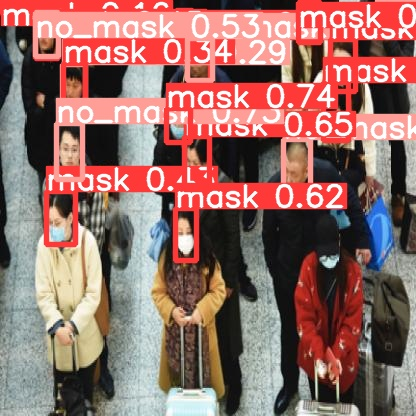

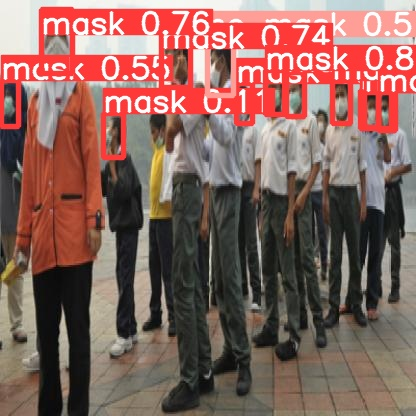

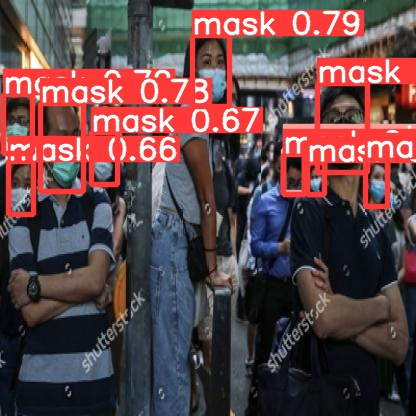

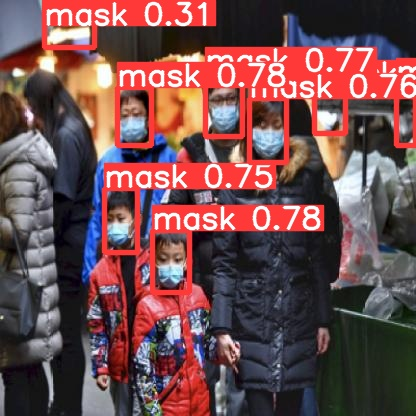

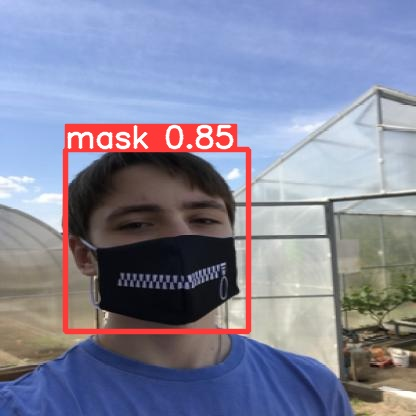

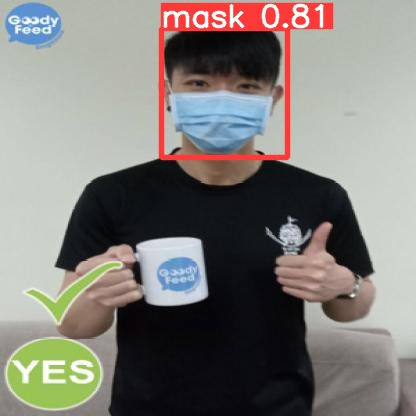

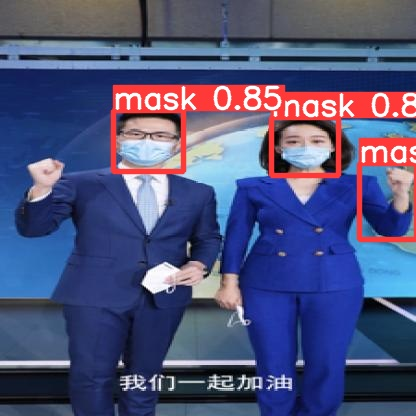

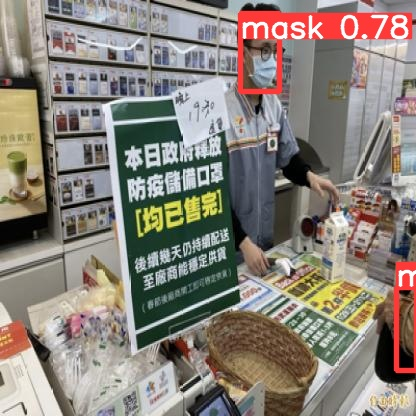

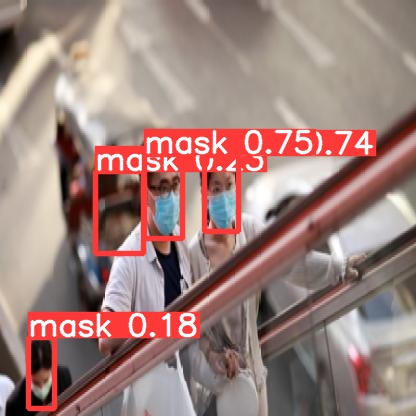

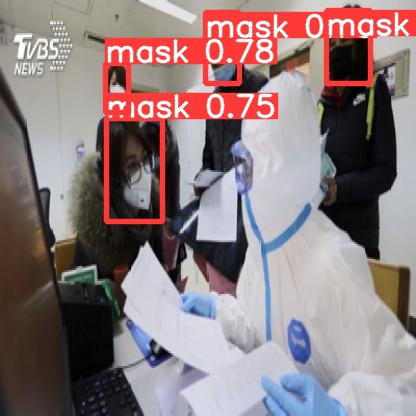

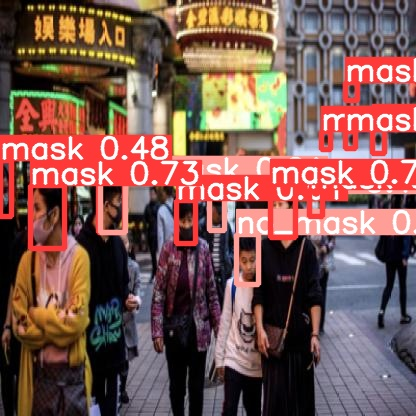

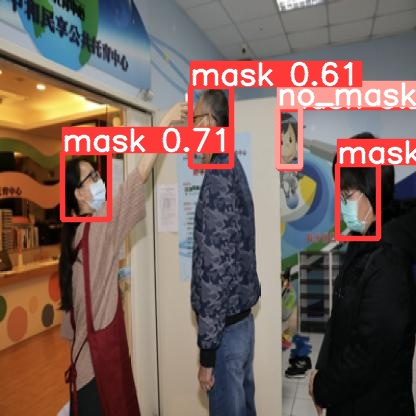

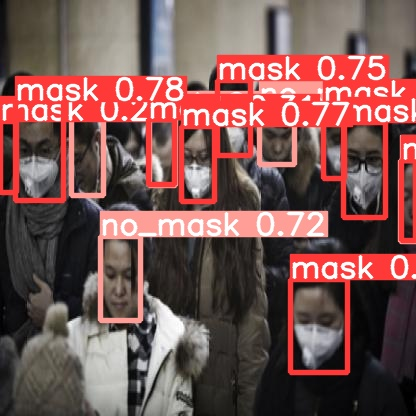

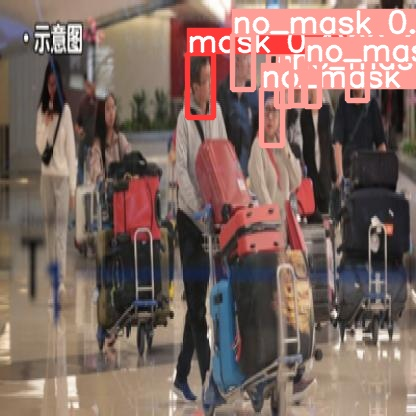

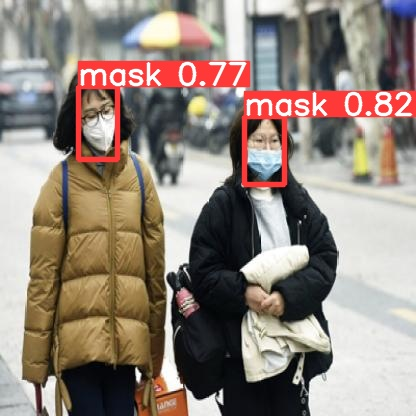

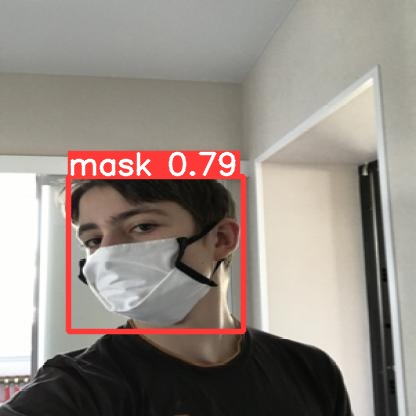

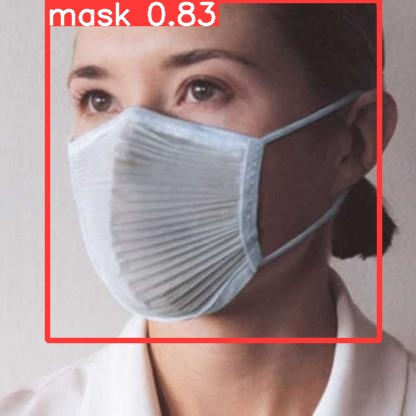

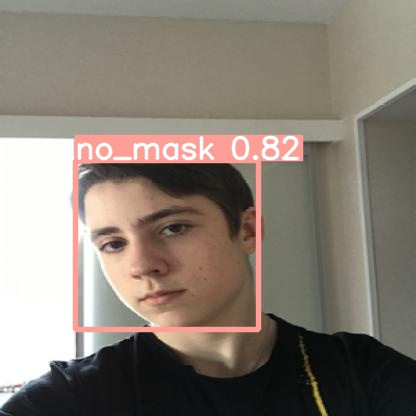

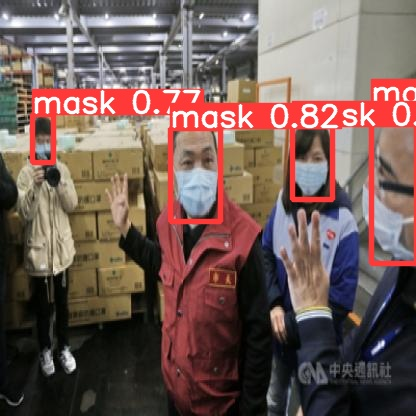

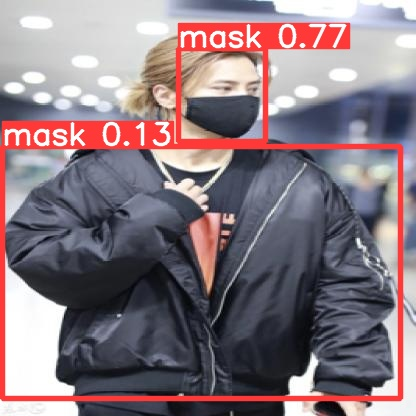

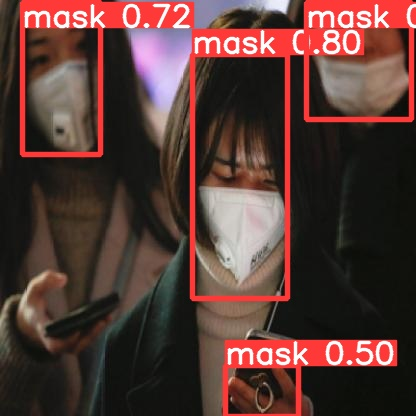

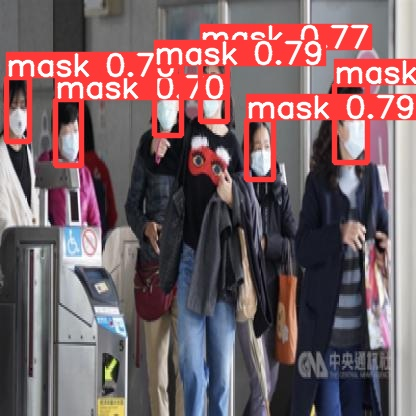

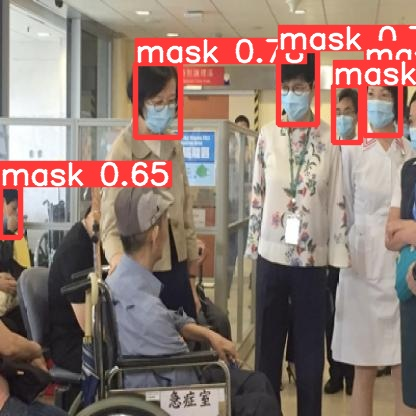

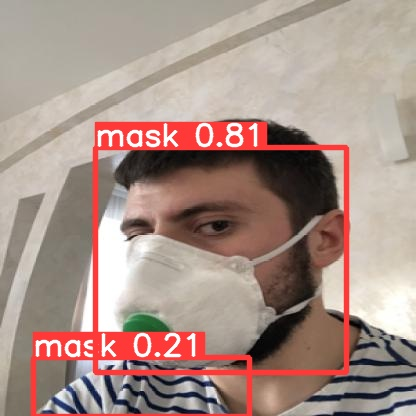

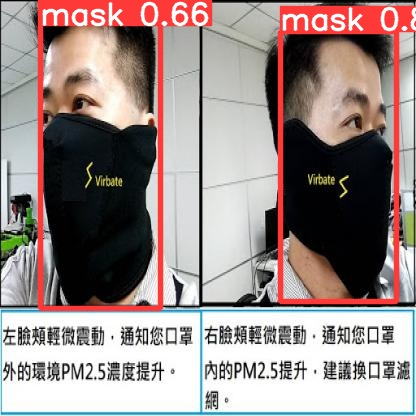

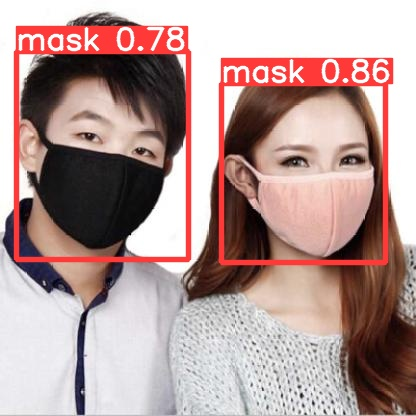

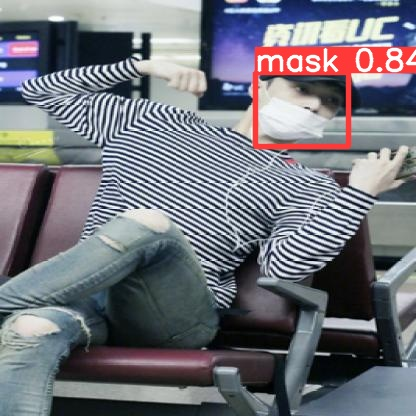

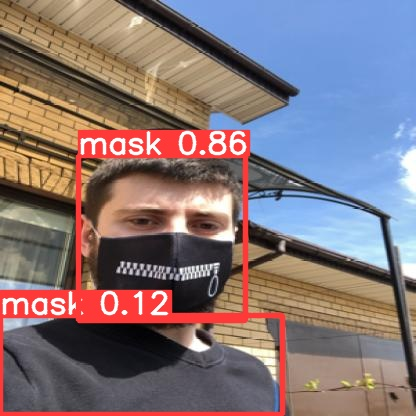

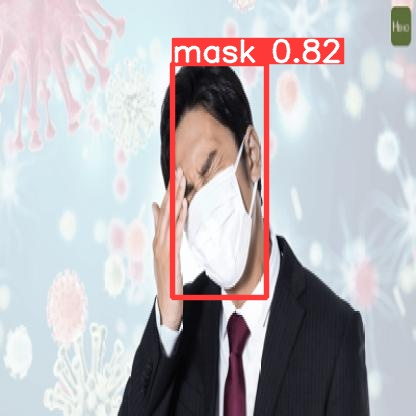

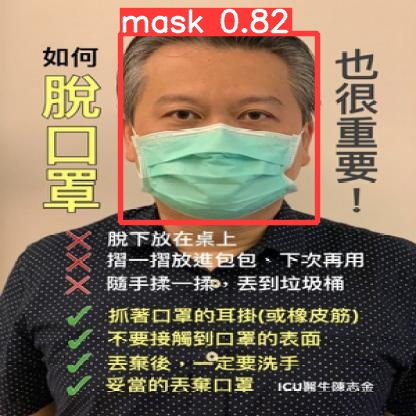

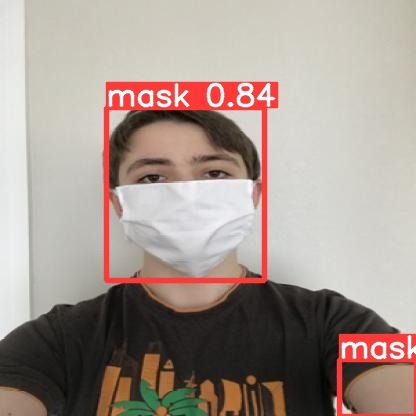

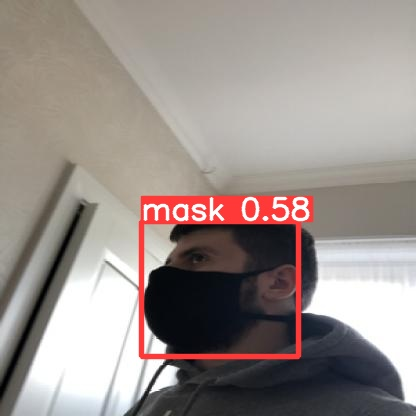

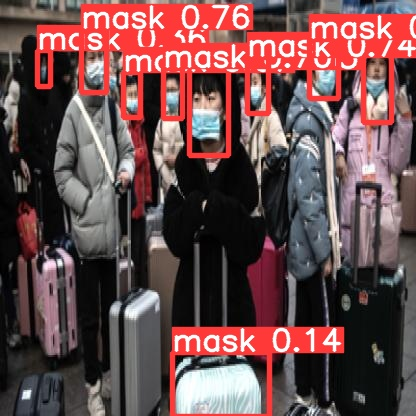

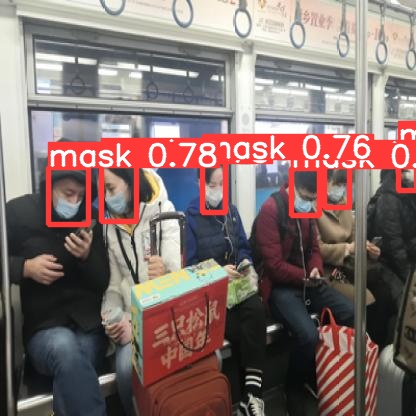

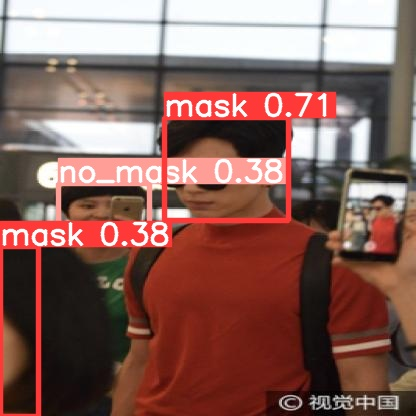

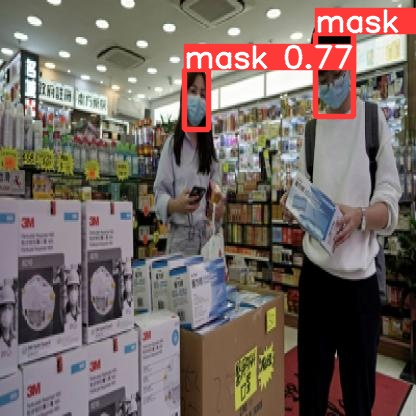

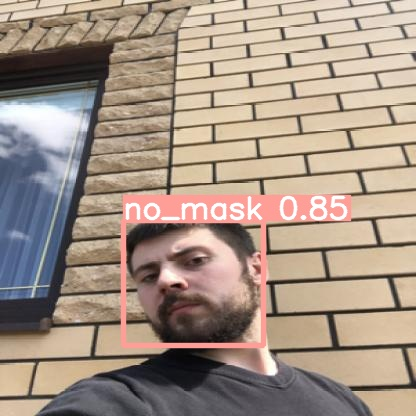

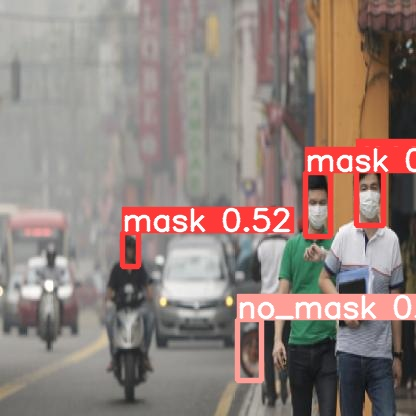

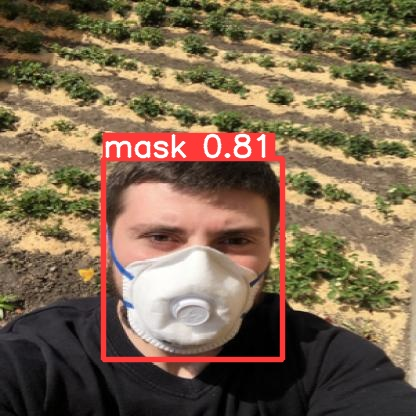

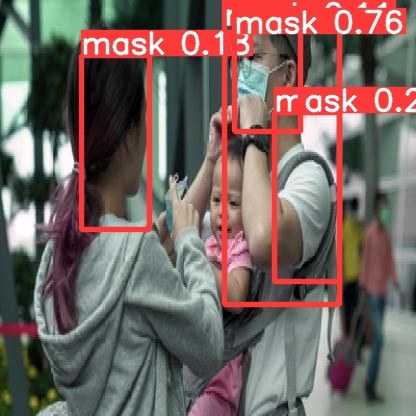

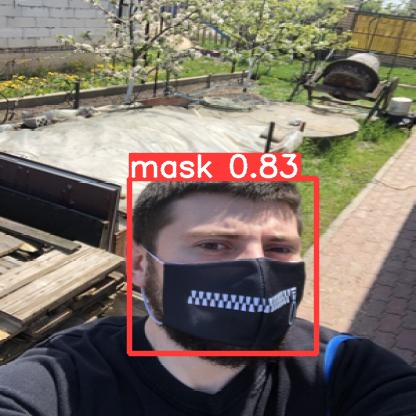

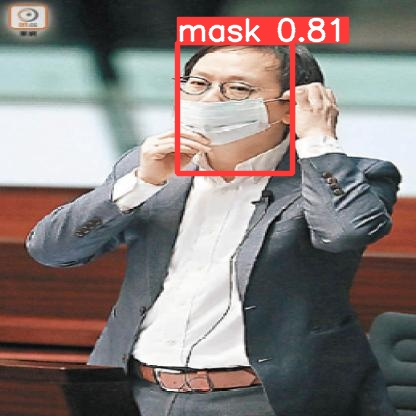

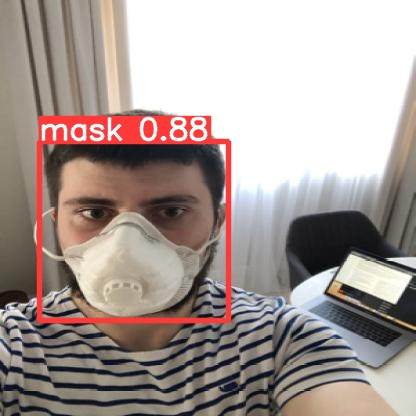

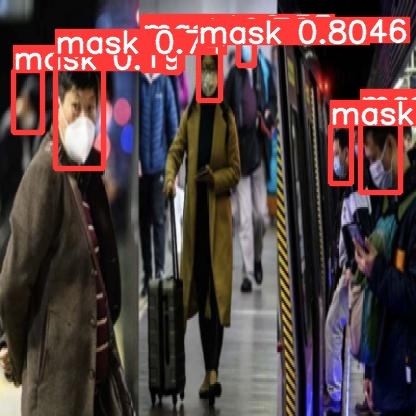

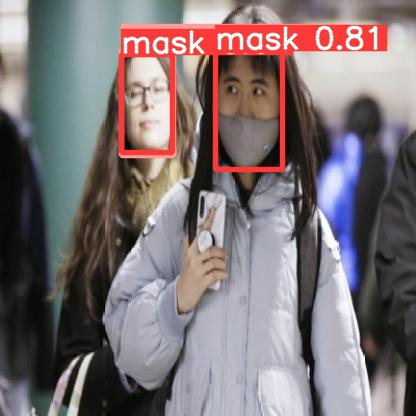

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [11]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source https://youtu.be/eibhK1fgG48

Streaming output truncated to the last 5000 lines.
0: 256x416 11 masks, 1 no_mask, 6.3ms
0: 256x416 11 masks, 1 no_mask, 7.7ms
0: 256x416 11 masks, 1 no_mask, 6.4ms
0: 256x416 11 masks, 1 no_mask, 6.3ms
0: 256x416 11 masks, 1 no_mask, 6.5ms
0: 256x416 11 masks, 1 no_mask, 6.3ms
0: 256x416 11 masks, 6.5ms
0: 256x416 11 masks, 6.8ms
0: 256x416 11 masks, 6.2ms
0: 256x416 11 masks, 6.2ms
0: 256x416 11 masks, 6.4ms
0: 256x416 11 masks, 6.6ms
0: 256x416 11 masks, 6.3ms
0: 256x416 11 masks, 6.2ms
0: 256x416 11 masks, 6.2ms
0: 256x416 11 masks, 6.2ms
0: 256x416 7 masks, 6.6ms
0: 256x416 7 masks, 6.5ms
0: 256x416 7 masks, 7.1ms
0: 256x416 7 masks, 6.4ms
0: 256x416 7 masks, 6.3ms
0: 256x416 7 masks, 9.2ms
0: 256x416 7 masks, 6.3ms
0: 256x416 7 masks, 6.4ms
0: 256x416 7 masks, 6.2ms
0: 256x416 7 masks, 6.4ms
0: 256x416 7 masks, 6.3ms
0: 256x416 7 masks, 6.9ms
0: 256x416 7 masks, 6.5ms
0: 256x416 7 masks, 6.2ms
0: 256x416 7 masks, 6.4ms
0: 256x416 7 masks, 10.2ms
0: 256x416 7 masks, 6.3ms
0: 256x4

In [12]:
!python detect.py --weights /content/yolov5/runs/detect/exp6.pt --img 416 --conf 0.1 --source 0

detect: weights=['/content/yolov5/runs/detect/exp6.pt'], source=0, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Traceback (most recent call last):
  File "detect.py", line 261, in <module>
    main(opt)
  File "detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "detect.py", line 98, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
  File "/content/yolov5/models/common.py